In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit
import scipy.integrate as integrate
import scipy.special as spec

In [3]:
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_65_ii.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:      6     159500-20000 2023-10-14 +01 16 35.5
          RADIO                  Ta    
        km/s-LSR                 I
       -1344.655972938930     -0.1954584
       -1343.728975147630     -0.1933326
       -1342.801977356397     -0.1922946
       -1341.874979565097     -0.1953000
       -1340.947981773863     -0.1917579
       -1340.020983982629     -0.1925162
       -1339.093986191396     -0.1955920
       -1338.166988400162     -0.1920820
       -1337.239990608862     -0.1943374
       -1336.312992817628     -0.1876923
       -1335.385995026395     -0.1876896
       -1334.458997235161     -0.1901431
       -1333.531999443928     -0.1932248
       -1332.605001652627     -0.1954865
       -1331.678003861394     -0.1895063
       -1330.751006070160     -0.1907352
       -1329.824008278927     -0.1907204
       -1328.897010487693     -0.1884487
       -1327.970012696393     -0.1894762
       -1327.043014905160     -0.1866843
       -1326.116017113926     -0.1883685
       -132

In [67]:
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_65_ii.ascii'

In [89]:
l = file_path[64:70]
print(int(l)/1000)

159.5


In [90]:
b = file_path[71:76]
print(int(b)/1000)

20.0


In [91]:
len(content)

134485

In [7]:
data = ascii.read(file_path, data_start=3)
x=data['col1']
y=data['col2']

In [8]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/159500n20000_65_ii.ascii'
# Load the ASCII file into a DataFrame
df = pd.read_csv(file_path)  # Example: tab-delimited file
# said low_memory=False so it reads whole file instead of guessing
# Display the first few rows of the DataFrame
print(data)

       col1             col2    
------------------ -------------
 -1344.65597293893    -0.1954584
 -1343.72897514763    -0.1933326
-1342.801977356397    -0.1922946
-1341.874979565097       -0.1953
-1340.947981773863    -0.1917579
-1340.020983982629    -0.1925162
-1339.093986191396     -0.195592
-1338.166988400162     -0.192082
-1337.239990608862    -0.1943374
-1336.312992817628    -0.1876923
-1335.385995026395    -0.1876896
-1334.458997235161    -0.1901431
-1333.531999443928    -0.1932248
               ...           ...
 1681.064817693967    0.01450103
   1681.9918154852    0.00395764
 1682.918813276434   0.001560753
 1683.845811067701   0.004548784
 1684.772808858934   0.004258784
 1685.699806650201    -0.0025733
 1686.626804441435 -0.0001467489
 1687.553802232668 -0.0009814822
 1688.480800023935  -0.002541834
 1689.407797815169  -0.001639074
 1690.334795606402   0.005328654
 1691.261793397669  0.0009559962
 1692.188791188903   0.001059177
Length = 3277 rows


C:\Users\dhami\AppData\Local\Temp\ipykernel_28928\3429675222.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


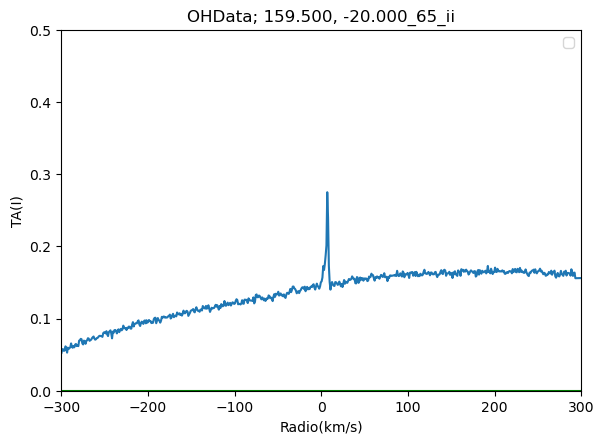

In [9]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]

plt.xlim([-300, 300])
plt.ylim([0, .50])
plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OHData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.tight_layout(pad=2.0) # so data doesn't overlap

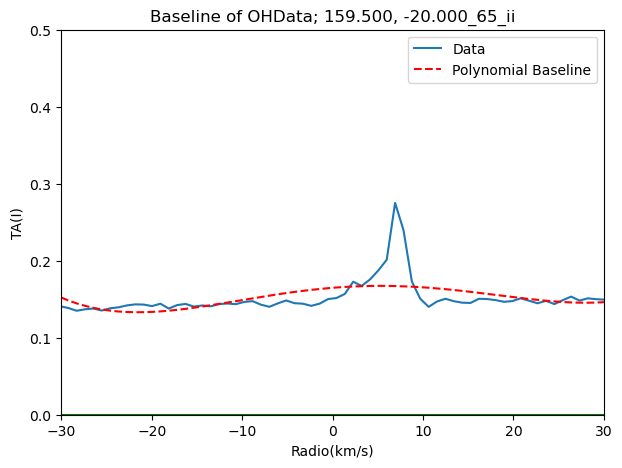

In [10]:
#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 0) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])

#params =  poly_model.guess(y, x=x)
#result = poly_model.fit(y, params, x=x
#print(result.fit_report())
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([0, .50])
plt.plot(x, y, label='Data')
plt.axhline(0, color='green')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Baseline of OHData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [11]:
y_sub = y - y_eval

C:\Users\dhami\miniforge3\envs\STARTastro\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


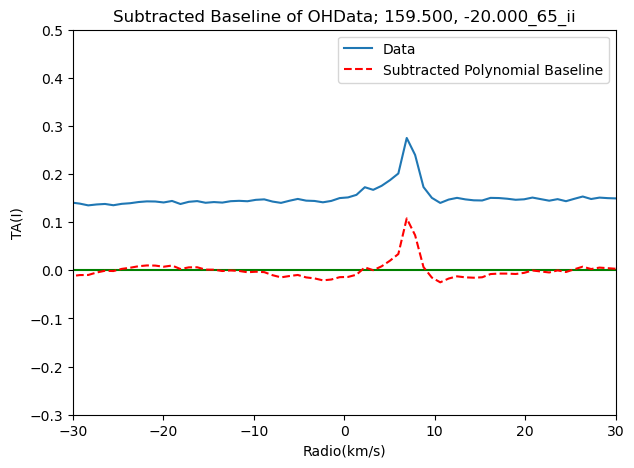

In [12]:
# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 0) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2
# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])
# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.30, .50])
plt.axhline(0, color='green')
plt.plot(x, y, label='Data')
plt.plot(x, y_sub, label='Subtracted Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Subtracted Baseline of OHData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [13]:
# RMS red
noise=np.std(y[gooddata]) * u.K
noise

<Quantity 0.02244524 K>

In [14]:
noise_sub=np.std(y_sub[gooddata]) * u.K
noise_sub
#noise_sub.to('mK')

<Quantity 0.01942187 K>

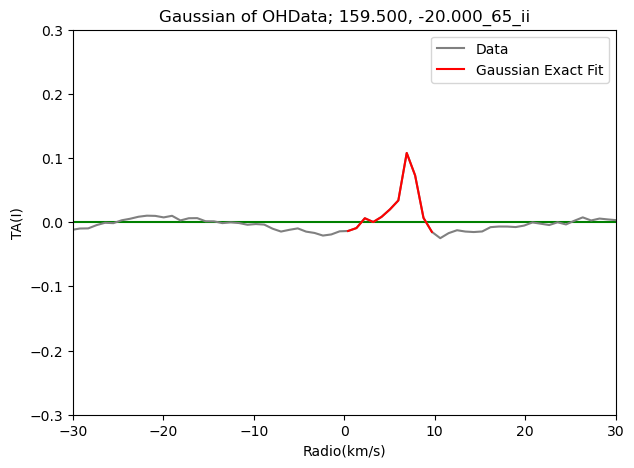

In [15]:
# Gaussian Model-exact fit
gauss_model=GaussianModel()
region = np.where((x >= 0) & (x <= 10))[0]

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.axhline(0, color='green')
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-30, 30])
plt.ylim([-.3, .3])
plt.plot(x[region], y_sub[region], '-',label='Gaussian Exact Fit',color='r')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [92]:
paramTable = pd.DataFrame(columns=['l','b','int','interr','amp', 'amperr', 'fwhm', 'fwhmerr', 'center', 'centererr'])
paramTable

,l,b,int,interr,amp,amperr,fwhm,fwhmerr,center,centererr


In [95]:
paramTable.iloc[len(paramTable)] = ['105', '3', 1, 0.1, 2, 0.2, 2, 0.2, 7, 1]

IndexError: iloc cannot enlarge its target object

In [96]:
# Gaussian Fit
# params = gauss_model.guess(y_sub[region], x=x[region])
# regionfit = gauss_model.fit(y_sub[region], params, x=x[region])
# y_gauss_region = gauss_model.eval(params, x=x)

# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
    x=vel 
    y_sub=ta
    # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # Initial Guess of the parameters
    params = gauss_model.guess(y_sub[region], x=x[region])
    # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y_sub[region], params, x=x[region])
    #fitresult = [region1fit, region2fit, region3fit]
    fitresult = [regionfit]
    return fitresult

In [97]:
fitResult = gaussFit(x, y_sub, bounds = [0, 10])

C:\Users\dhami\miniforge3\envs\STARTastro\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


In [98]:
new_row = pd.DataFrame([[105, 20, integral, err, 
                         fitResult[0].params['amplitude'].value,
                         fitResult[0].params['amplitude'].stderr,
                         fitResult[0].params['fwhm'].value,
                         fitResult[0].params['fwhm'].stderr,
                         fitResult[0].params['center'].value,
                         fitResult[0].params['center'].stderr
                        ]],
                       columns=['l','b','int','interr','amp', 'amperr', 'fwhm', 'fwhmerr', 'center', 'centererr'])

In [80]:
new_row

,l,b,int,interr,amp,amperr,fwhm,fwhmerr,center,centererr
0,105,20,0.403888,0.076452,0.212955,0.020852,1.781724,0.199838,7.115608,0.086206


In [83]:
df = pd.concat([paramTable, new_row], ignore_index=True)

C:\Users\dhami\AppData\Local\Temp\ipykernel_28928\1208466150.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([paramTable, new_row], ignore_index=True)


In [85]:
df

,l,b,int,interr,amp,amperr,fwhm,fwhmerr,center,centererr
0,105,20,0.403888,0.076452,0.212955,0.020852,1.781724,0.199838,7.115608,0.086206


In [49]:
print(fitResult[0].params['fwhm'].value)
print(fitResult[0].params['fwhm'].stderr)

1.7817240297148107
0.19983803315501897


In [50]:
print(fitResult[0].params['amplitude'].value)
print(fitResult[0].params['amplitude'].stderr)

0.2129550014607469
0.02085237478175231


In [51]:
print(fitResult[0].params['center'].value)
print(fitResult[0].params['center'].stderr)

7.115608343750262
0.08620578976846992


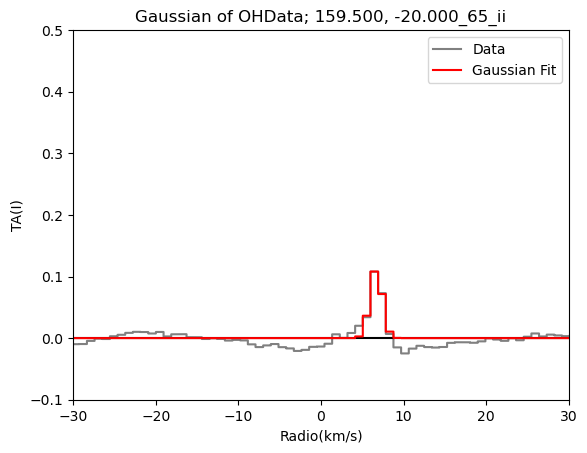

In [99]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.step(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-30, 30])
plt.ylim([-.1, .5])
plt.step(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 159.500, -20.000_65_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [20]:
# Computing the Integral
def integral(vel, ta, bounds, deltav):
    mask = (vel >= bounds[0]) & (vel <= bounds[1])
    deltav = vel[1]-vel[0]
    return np.sum(ta[mask])*deltav

In [21]:
vel = x
ta = y_sub
deltav = vel[1]-vel[0]
bounds = [-15, 15]
# Baseline Subtraction
poly_model = PolynomialModel(degree=4)
gooddata = np.where((vel >= -15) & (vel <= 15))[0]
params = poly_model.guess(ta[gooddata], x=vel[gooddata])
result = poly_model.fit(ta[gooddata], params, x=vel[gooddata])
y_eval = poly_model.eval(result.params, x=vel)
ta = y - y_eval
# Compute Integral
result = integral(vel, ta, bounds, deltav)
print(f"Integral from {bounds[0]} to {bounds[1]} = {result}")

Integral from -15 to 15 = 4.727916693743489


In [22]:
# Integration range? We only want to integrate under the Gaussian, how do we do that?
integral = np.sum(ta[region])*deltav
print(integral)
print(integral*2.3e14)

1.7439159530517852
401100669201910.56


In [23]:
#Checking noise in the baseline regions:
np.std(ta[gooddata])

np.float64(0.023051055815028)

In [24]:
# Number of channels in Local Profile intergral
print(len(vel[region]))
print(np.sqrt(len(vel[region])) * np.std(ta[gooddata]))
err = np.sqrt(len(vel[region])) * np.std(ta[gooddata])

11
0.07645170315998787


In [25]:
integral/err

np.float64(22.810688068025794)

In [26]:
# Extract fitted parameters
params = fitResult[0].params
ampl = params['amplitude'].value
sigma = params['sigma'].value

# Errors (1-sigma uncertainties)
ampl_err = params['amplitude'].stderr
sigma_err = params['sigma'].stderr

# Compute the integral and its uncertainty
integral = ampl * sigma * np.sqrt(2 * np.pi)

# Propagate the uncertainty
# ΔI = I * sqrt((ΔA/A)^2 + (Δσ/σ)^2)
if ampl != 0 and sigma != 0:
    integral_err = integral * np.sqrt((ampl_err/ampl)**2 + (sigma_err/sigma)**2)
else:
    integral_err = np.nan  # Prevent divide-by-zero

# Add to a Pandas DataFrame
df = pd.DataFrame({
    'amplitude': [ampl],
    'sigma': [sigma],
    'center': [params['center'].value],
    'integral': [integral],
    'integral_err': [integral_err]
})

print(df)

   amplitude     sigma    center  integral  integral_err
0   0.212955  0.756629  7.115608  0.403888      0.060135
